In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the grid in xyz format

In [2]:
df = pd.read_table('./data/GDA20z50_DEM9s_NPB-AoI.xyz',
                skiprows=0,
                delim_whitespace=True,
                names=['x', 'y', 'elevation'])

Sorting the df ('y' in descending order followe by 'x' in ascending order) to correctly reshape to grid

In [3]:
df = df.sort_values(['y', 'x'], ascending=[False, True])
df.head(20)

,x,y,elevation
0,313440.618085,6.800458e+06,230.962997
1,313677.096019,6.800458e+06,233.854095
2,313913.573953,6.800458e+06,238.395996
3,314150.051887,6.800458e+06,243.541794
4,314386.529822,6.800458e+06,247.499603
5,314623.007756,6.800458e+06,245.247299
6,314859.485690,6.800458e+06,242.255707
7,315095.963624,6.800458e+06,240.003296
8,315332.441559,6.800458e+06,240.003296
9,315568.919493,6.800458e+06,241.032303


Describing df

In [4]:
df.describe()

,x,y,elevation
count,381195.000000,3.811950e+05,381195.000000
mean,359080.859390,6.662242e+06,-747.795758
std,26418.617357,7.988030e+04,2950.995613
min,313440.618085,6.524026e+06,-9999.000000
25%,336142.499770,6.593134e+06,73.408688
50%,359080.859390,6.662242e+06,202.737595
75%,382019.219010,6.731350e+06,259.984497
max,404721.100695,6.800458e+06,408.144501


Histogram of elevations with default value of -9999

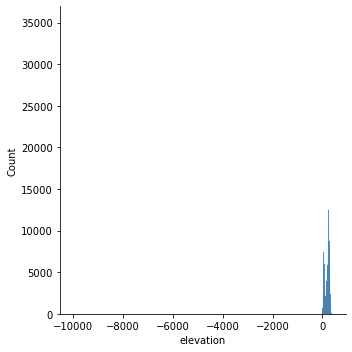

In [6]:
sns.displot(df.elevation)

Histogram of elevations without default value of -9999

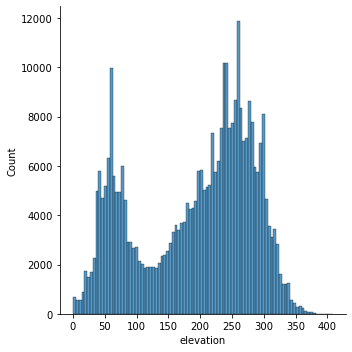

In [8]:
clean_df = df[df['elevation'] != -9999].copy()
sns.displot(clean_df.elevation)

Plot using cleaned df

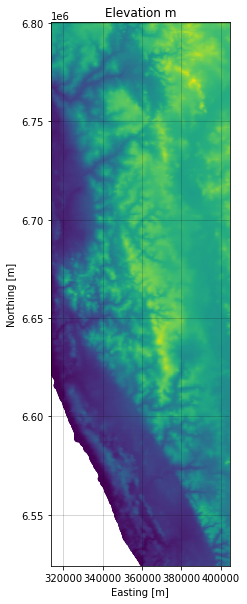

In [14]:
extent = x_min, x_max, y_min, y_max = [clean_df.x.min(), clean_df.x.max(),
                                       clean_df.y.min(), clean_df.y.max()]

fig, ax = plt.subplots(figsize=(8,10))

ax.scatter(clean_df.x, clean_df.y, c=clean_df.elevation)
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Elevation m')
ax.grid(c='k', alpha=0.2)


plt.show()

Saving the df columns into numpy arrays and obtaining matrix dimensions (m x n) where m is rows and n is columns

In [15]:
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['elevation'])

m = len(np.unique(y))
n = len(np.unique(x))

In [16]:
print(f"Matrix: {m} x {n}")

Matrix: 985 x 387


In [20]:
print(x)
print(y)
print(z)

[313440.61808481 313677.09601903 313913.57395326 ... 404248.14482671
 404484.62276093 404721.10069516]
[6800457.81405613 6800457.81405613 6800457.81405613 ... 6524025.50050428
 6524025.50050428 6524025.50050428]
[230.96299744 233.85409546 238.39599609 ... 151.11450195 156.14390564
 160.17720032]


In [21]:
grid_y = np.reshape(y, (m, n))
print(grid_y)

[[6800457.81405613 6800457.81405613 6800457.81405613 ... 6800457.81405613
  6800457.81405613 6800457.81405613]
 [6800176.88690821 6800176.88690821 6800176.88690821 ... 6800176.88690821
  6800176.88690821 6800176.88690821]
 [6799895.95976029 6799895.95976029 6799895.95976029 ... 6799895.95976029
  6799895.95976029 6799895.95976029]
 ...
 [6524587.35480011 6524587.35480011 6524587.35480011 ... 6524587.35480011
  6524587.35480011 6524587.35480011]
 [6524306.4276522  6524306.4276522  6524306.4276522  ... 6524306.4276522
  6524306.4276522  6524306.4276522 ]
 [6524025.50050428 6524025.50050428 6524025.50050428 ... 6524025.50050428
  6524025.50050428 6524025.50050428]]


In [22]:
grid_x = np.reshape(x, (m, n))
grid_x

array([[313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       ...,
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516]])

In [24]:
grid_z = np.reshape(z, (m, n))
grid_z[grid_z == -9999] = 0
grid_z

array([[230.96299744, 233.85409546, 238.39599609, ..., 299.84890747,
        299.21630859, 298.92910767],
       [216.71279907, 217.42179871, 223.77160645, ..., 299.54568481,
        299.1098938 , 298.8494873 ],
       [219.94050598, 219.79330444, 218.37229919, ..., 299.27539062,
        299.05758667, 298.78659058],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 168.58729553,
        179.89570618, 179.3493042 ],
       [  0.        ,   0.        ,   0.        , ..., 161.17129517,
        169.24029541, 171.35519409],
       [  0.        ,   0.        ,   0.        , ..., 151.11450195,
        156.14390564, 160.17720032]])

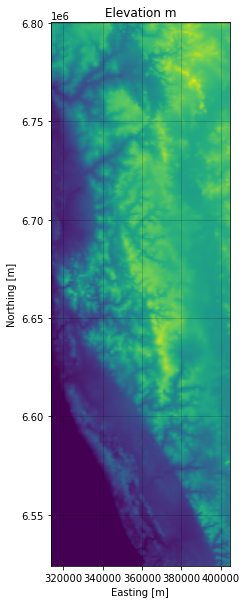

In [26]:
fig, ax = plt.subplots(figsize=(8,10))

ax.scatter(grid_x, grid_y, c=grid_z)
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Elevation m')
ax.grid(c='k', alpha=0.2)


plt.show()

# plt.figure(figsize=(6, 10))
# plt.scatter(grid_x, grid_y, c=grid_z)

Define a coordinate (well coordinate) to interpolate

In [28]:
x_well = 360000.0
y_well = 6650000.0

Define a "radius" of interpolation:
Grab all the x, y, z points in that area to make an n-dimensional interpolator.

In [29]:
r = 10000 # 10 km

In [30]:
x_well_min = x_well - r
x_well_max = x_well + r
y_well_min = y_well - r
y_well_max = y_well + r

In [35]:
df_well = clean_df[(clean_df.x >= x_well_min) & (clean_df.x <= x_well_max) &
                   (clean_df.y >= y_well_min) & (clean_df.y <= y_well_max)]
df_well

,x,y,elevation
193655,350094.697889,6.659994e+06,224.332703
193656,350331.175824,6.659994e+06,218.185104
193657,350567.653758,6.659994e+06,212.849701
193658,350804.131692,6.659994e+06,212.849701
193659,351040.609626,6.659994e+06,208.022400
...,...,...,...
221212,369012.932627,6.640048e+06,348.507111
221213,369249.410562,6.640048e+06,352.254395
221214,369485.888496,6.640048e+06,355.069000
221215,369722.366430,6.640048e+06,355.749298


In [36]:
df_well.describe()

,x,y,elevation
count,6120.000000,6.120000e+03,6120.000000
mean,360026.771127,6.650021e+06,246.568538
std,5802.622972,5.838875e+03,45.456291
min,350094.697889,6.640048e+06,143.914307
25%,355060.734508,6.645035e+06,213.550224
50%,360026.771127,6.650021e+06,243.931648
75%,364992.807746,6.655008e+06,276.357788
max,369958.844364,6.659994e+06,355.911804


In [38]:
from scipy.interpolate import Rbf

rbfi = Rbf(df_well.x, df_well.y, df_well.elevation)

di = rbfi(x_well, y_well)

In [42]:
di.T

array(195.6212624)

In [40]:
mi = np.min(np.hstack([di.ravel(), df_well.elevation.values]))
ma = np.max(np.hstack([di.ravel(), df_well.elevation.values]))

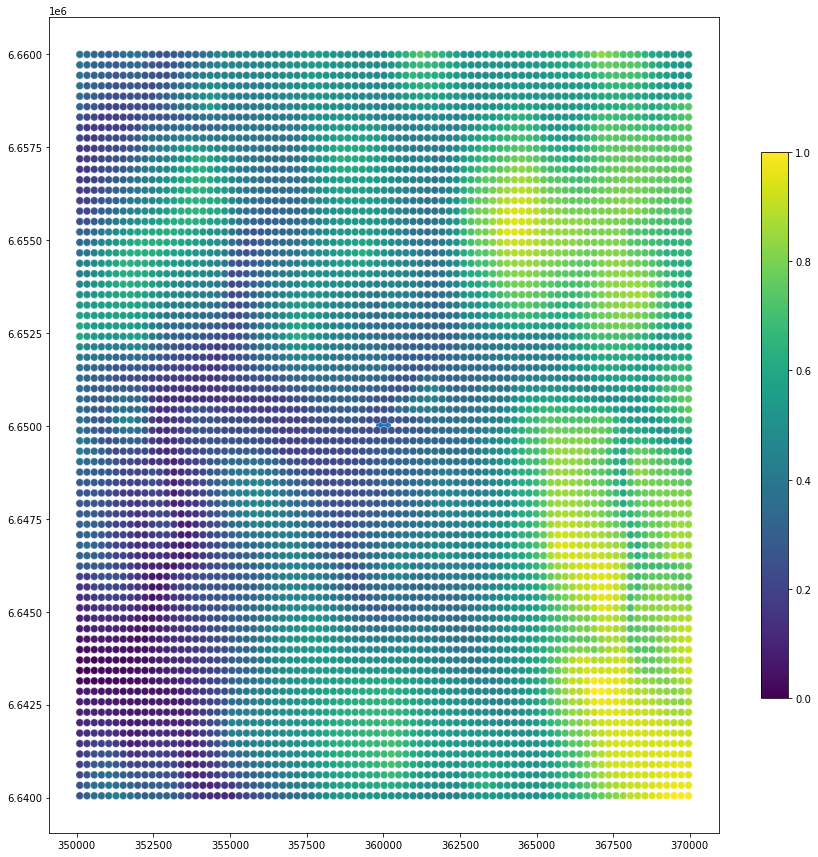

In [48]:
plt.figure(figsize=(15,15))
c1 = plt.scatter(x_well, y_well, di, vmin=mi, vmax=ma)
c2 = plt.scatter(df_well.x, df_well.y, s=60, c=df_well.elevation, edgecolor='#ffffff66', vmin=mi, vmax=ma)

plt.colorbar(c1, shrink=0.67)
plt.show()

In [ ]:
mi = np.min(np.hstack([di.ravel(), df.por.values]))
ma = np.max(np.hstack([di.ravel(), df.por.values]))